## Loading the Data

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv("titanic_train.csv")

# Display the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning

In [14]:
# Check for missing values
df.isnull().sum()

# Fill missing values in 'Age' with the median age
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Drop the 'Cabin' column due to too many missing values
df.drop('Cabin', axis=1, inplace=True)

# For 'Embarked', fill missing values with the mode
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

# Verify if there are any remaining missing values
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Exploratory Data Analysis (EDA)

**Univariate Analysis**

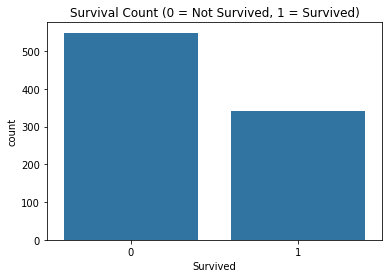

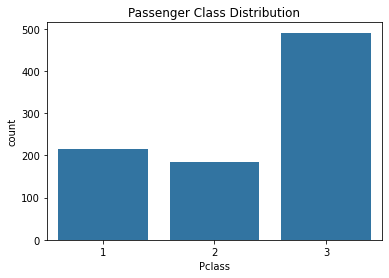

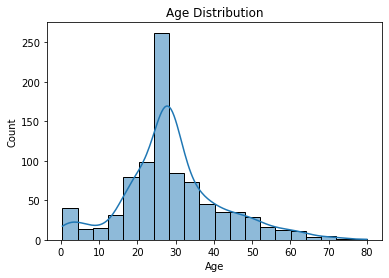

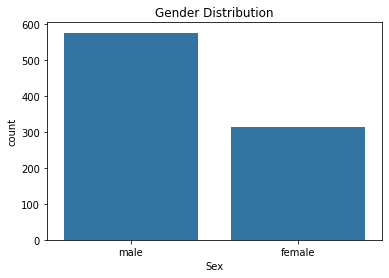

In [15]:
# Countplot of survival
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = Not Survived, 1 = Survived)')
plt.show()

# Countplot of passenger class
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

# Distribution of age
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Countplot of gender
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()


**Bivariate Analysis**

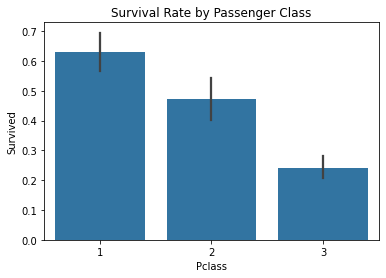

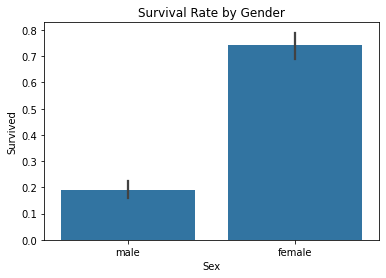

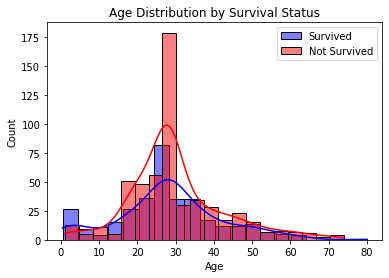

In [16]:
# Survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Age distribution of passengers who survived vs. not survived
sns.histplot(df[df['Survived'] == 1]['Age'], bins=20, kde=True, color='blue', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], bins=20, kde=True, color='red', label='Not Survived')
plt.title('Age Distribution by Survival Status')
plt.legend()
plt.show()


**Multivariate Analysis**

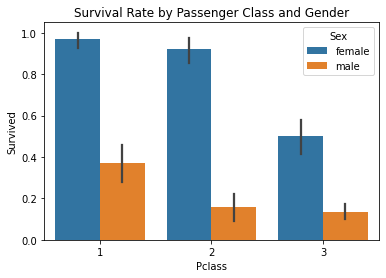

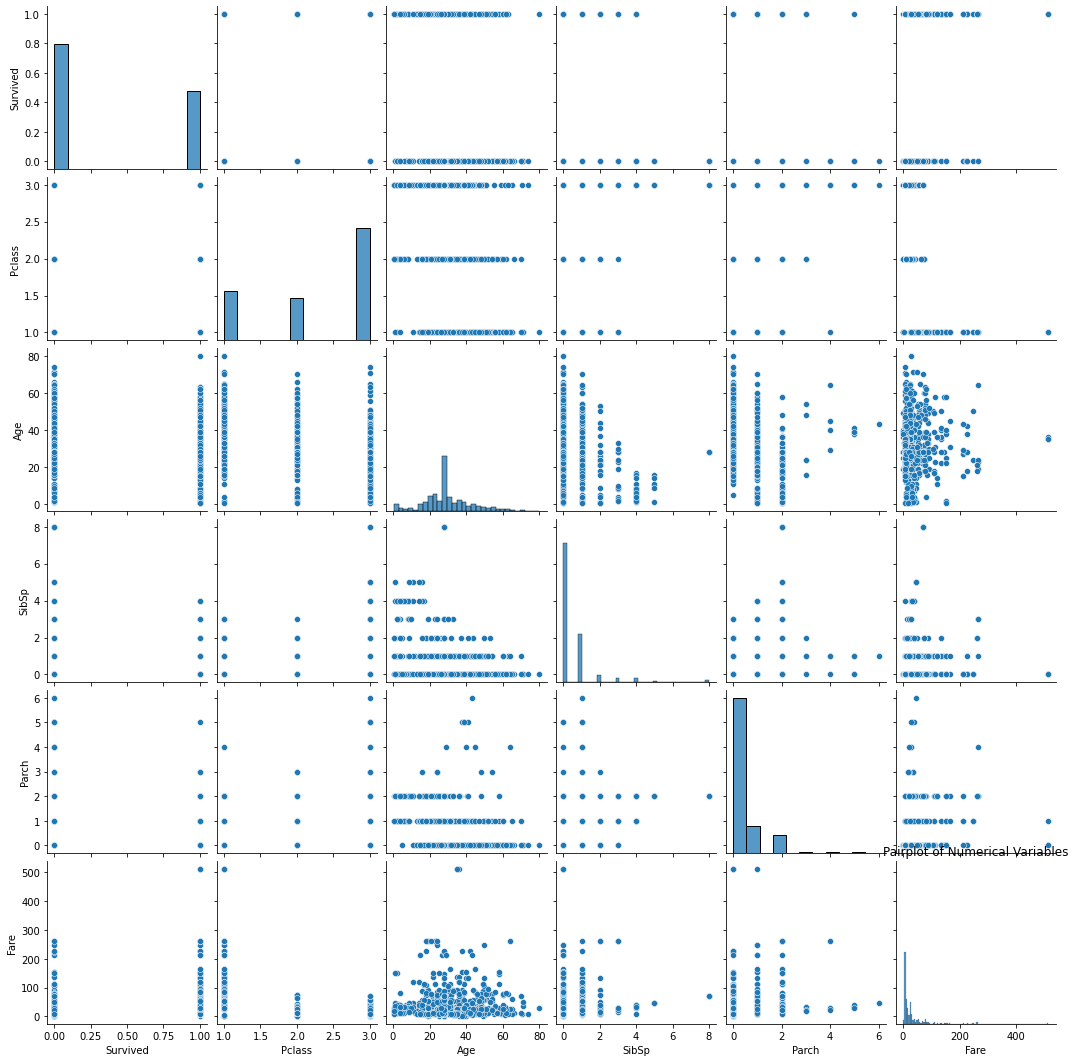

In [17]:
# Survival rate by both Pclass and Sex
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Passenger Class and Gender')
plt.show()

# Pairplot for numerical variables
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
plt.title('Pairplot of Numerical Variables')
plt.show()


## Conclusion

Through this EDA, we've explored various aspects of the Titanic dataset, such as survival rates across different demographics, passenger class distributions, and age distributions. We've identified trends such as higher survival rates among females and passengers in higher classes, as well as insights into age distribution among survivors.